In [781]:
from manim import *
from functools import reduce
import numpy as np
import sympy as sym
from sympy.interactive.printing import init_printing
init_printing(use_unicode=False, wrap_line=False)
from sympy.matrices import Matrix

In [782]:
#returns the translation matrix in homogeneous coordinates, shifted x units up and y units to the left
def translationMatrix(x,y):
    return np.array([[1,0,x],
                     [0,1,y],
                     [0,0,1]])

#returns the rotation matrix for a rotation of theta radians in the counterclockwise direction in homogeneous coordinates
def rotationMatrix(theta):
    return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta), np.cos(theta), 0],
                     [0,0,1]])

#composes matricies Mn,...,M2,M1 as left multiplication, Mn(...(M2(M1)))
#compose(M3,M2,M1) = M3(M2*M1)
#For coordinate matrix B, and transformations T1, T2,... Tn, compose(Tn,...,T2,T1,B)
def compose(*transformations):
    return reduce(np.matmul, transformations)


In [783]:
#matrix of column vectors corresponding to our original triangle verticies
B = np.array([[-1,0,1],[-2,-1,-2],[1,1,1]])
#translate a vector or matrix of column vectors up by 2
T1= translationMatrix(0,1)
#rotate a vector or matrix of column vectors by 
T2= rotationMatrix(-np.pi/3)
T3= translationMatrix(4.5*np.sqrt(3),4.5)


In [784]:
class scene1(Scene):
    def construct(self):
        plane = NumberPlane(
            x_range = (-4,11,1),
            y_range = (-3,7,1),
        ).move_to(LEFT*0.5+UP*0.6)

        triangle = Polygon(*plane.coords_to_point(B.transpose()),color=GREEN)
        point1 = Dot(plane.coords_to_point(5*np.sqrt(3),5))
        point1label = MathTex(r"(5\sqrt{3},5)",font_size = 40).next_to(point1,DOWN)
        self.add(plane,triangle,point1,point1label)

class scene2(Scene):
    def construct(self):
        plane = NumberPlane(
            x_range = (-4,11,1),
            y_range = (-3,7,1),
        ).move_to(LEFT*0.5+UP*0.6)

        triangle = Polygon(*plane.coords_to_point(compose(T1,B).transpose()),color=GREEN)
        point1 = Dot(plane.coords_to_point(5*np.sqrt(3),5))
        point1label = MathTex(r"(5\sqrt{3},5)",font_size = 40).next_to(point1,DOWN)
        self.add(plane,triangle,point1,point1label)

class scene3(Scene):
    def construct(self):
        plane = NumberPlane(
            x_range = (-4,11,1),
            y_range = (-3,7,1),
        ).move_to(LEFT*0.5+UP*0.6)

        triangle = Polygon(*plane.coords_to_point(compose(T1,B).transpose()),color=GREEN)

        point1 = Dot(plane.coords_to_point(0,0))
        point2 = Dot(plane.coords_to_point(5*np.sqrt(3),0))
        point3 = Dot(plane.coords_to_point(5*np.sqrt(3),5))

        point1label = MathTex(r"(0,0)",font_size = 40).next_to(point1,LEFT+UP)
        point2label = MathTex(r"(5\sqrt{3},0)",font_size = 40).next_to(point2,DOWN)
        point3label = MathTex(r"(5\sqrt{3},5)",font_size = 40).next_to(point3,RIGHT)
        
        line1 = DashedLine(point1.get_center(),point2.get_center())
        line2 = DashedLine(point2.get_center(),point3.get_center())
        line3 = DashedLine(point1.get_center(),point3.get_center())
        line4 = DashedLine(plane.coords_to_point(0,-1),plane.coords_to_point(0,4))

        angle1 = Angle(line1,line3,radius = 2)
        angle1label = MathTex(r"\theta_1 = \arctan \left(\frac{y}{x}\right) = \left(\frac{\pi}{6}\right)",font_size=40).next_to(angle1,RIGHT)
        angle2 = Angle(line3,line4,radius = 2.5)
        angle2label = MathTex(r"\theta_2 =\left(\frac{\pi}{3}\right)",font_size=40).next_to(angle2,UP)

        self.add(plane,triangle,point1,point2,point3,line2,line3,point1label,point2label,point3label, angle1, angle2,angle1label,angle2label)

class scene4(Scene):
    def construct(self):
        plane = NumberPlane(
            x_range = (-4,11,1),
            y_range = (-3,7,1),
        ).move_to(LEFT*0.5+UP*0.6)

        triangle = Polygon(*plane.coords_to_point(compose(T2,T1,B).transpose()),color=GREEN)

        point1 = Dot(plane.coords_to_point(0,0))
        point2 = Dot(plane.coords_to_point(5*np.sqrt(3),0))
        point3 = Dot(plane.coords_to_point(5*np.sqrt(3),5))

        point1label = MathTex(r"(0,0)",font_size = 40).next_to(point1,LEFT+UP)
        point2label = MathTex(r"(5\sqrt{3},0)",font_size = 40).next_to(point2,DOWN)
        point3label = MathTex(r"(5\sqrt{3},5)",font_size = 40).next_to(point3,RIGHT)
        
        line1 = DashedLine(point1.get_center(),point2.get_center())
        line2 = DashedLine(point2.get_center(),point3.get_center())
        line3 = DashedLine(point1.get_center(),point3.get_center())
        line4 = DashedLine(plane.coords_to_point(0,-1),plane.coords_to_point(0,4))

        angle1 = Angle(line1,line3,radius = 2)
        angle1label = MathTex(r"\theta_1 = \arctan \left(\frac{y}{x}\right) = \left(\frac{\pi}{6}\right)",font_size=40).next_to(angle1,RIGHT)
        angle2 = Angle(line3,line4,radius = 2.5)
        angle2label = MathTex(r"\theta_2 =\left(\frac{\pi}{3}\right)",font_size=40).next_to(angle2,UP)

        self.add(plane,triangle,line3,angle2,angle2label,point3,point3label)

class scene5(Scene):
    def construct(self):
        plane = NumberPlane(
            x_range = (-4,11,1),
            y_range = (-3,7,1),
        ).move_to(LEFT*0.5+UP*0.6)

        triangle = Polygon(*plane.coords_to_point(compose(T3,T2,T1,B).transpose()),color=GREEN)

        point1 = Dot(plane.coords_to_point(0,0))
        point2 = Dot(plane.coords_to_point(5*np.sqrt(3),0))
        point3 = Dot(plane.coords_to_point(5*np.sqrt(3),5))

        point1label = MathTex(r"(0,0)",font_size = 40).next_to(point1,LEFT+UP)
        point2label = MathTex(r"(5\sqrt{3},0)",font_size = 40).next_to(point2,DOWN)
        point3label = MathTex(r"(5\sqrt{3},5)",font_size = 40).next_to(point3,RIGHT)
        
        line1 = DashedLine(point1.get_center(),point2.get_center())
        line2 = DashedLine(point2.get_center(),point3.get_center())
        line3 = DashedLine(point1.get_center(),point3.get_center())
        line4 = DashedLine(plane.coords_to_point(0,-1),plane.coords_to_point(0,4))

        angle1 = Angle(line1,line3,radius = 2)
        angle1label = MathTex(r"\theta_1 = \arctan \left(\frac{y}{x}\right) = \left(\frac{\pi}{6}\right)",font_size=40).next_to(angle1,RIGHT)
        angle2 = Angle(line3,line4,radius = 2.5)
        angle2label = MathTex(r"\theta_2 =\left(\frac{\pi}{3}\right)",font_size=40).next_to(angle2,UP)

        self.add(plane,triangle,point3,point3label)


class scene6(Scene):
    def construct(self):
        plane = NumberPlane(
            x_range = (-4,11,1),
            y_range = (-3,7,1),
        ).move_to(LEFT*0.5+UP*0.6)
        
        triangle1 = Polygon(*plane.coords_to_point(B.transpose()),color=GREEN)
        triangle2 = Polygon(*plane.coords_to_point(compose(T1,B).transpose()),color=GREEN)
        triangle3 = Polygon(*plane.coords_to_point(compose(T2,T1,B).transpose()),color=GREEN)
        triangle4 = Polygon(*plane.coords_to_point(compose(T3,T2,T1,B).transpose()),color=GREEN)

        point1 = Dot(plane.coords_to_point(0,0))
        point2 = Dot(plane.coords_to_point(5*np.sqrt(3),0))
        point3 = Dot(plane.coords_to_point(5*np.sqrt(3),5))

        point1label = MathTex(r"(0,0)",font_size = 40).next_to(point1,LEFT+UP)
        point2label = MathTex(r"(5\sqrt{3},0)",font_size = 40).next_to(point2,DOWN)
        point3label = MathTex(r"(5\sqrt{3},5)",font_size = 40).next_to(point3,RIGHT)
        
        line1 = DashedLine(point1.get_center(),point2.get_center())
        line2 = DashedLine(point2.get_center(),point3.get_center())
        line3 = DashedLine(point1.get_center(),point3.get_center())
        line4 = DashedLine(plane.coords_to_point(0,-1),plane.coords_to_point(0,4))

        angle1 = Angle(line1,line3,radius = 2)
        angle1label = MathTex(r"\theta_1 = \arctan \left(\frac{y}{x}\right) = \left(\frac{\pi}{6}\right)",font_size=40).next_to(angle1,RIGHT)
        angle2 = Angle(line3,line4,radius = 2.5)
        angle2label = MathTex(r"\theta_2 =\left(\frac{\pi}{3}\right)",font_size=40).next_to(angle2,UP)

        transformationtext = MathTex(r"T_{\text{t}}(4.5\sqrt{3},4.5)",r"T_{\text{r}}(-\frac{\pi}{3})",r"T_{\text{t}}(0,1)",r"B").move_to(plane.coords_to_point(6,-1))
        framebox1 = SurroundingRectangle(transformationtext[2:4],buff=0.1)
        framebox2 = SurroundingRectangle(transformationtext[1:4],buff=0.1)
        framebox3 = SurroundingRectangle(transformationtext[0:4],buff=0.1)

        self.play(Create(plane),Create(triangle1),Create(point3),Create(point3label),Create(transformationtext))
        self.wait(2)
        self.play(Transform(triangle1,triangle2),Create(framebox1))
        self.wait(2)
        self.play(Create(line1),Create(line2),Create(line3),Create(angle1),Create(angle2),Create(angle1label),Create(angle2label))
        self.wait()
        self.play(Transform(triangle1,triangle3),Transform(framebox1,framebox2))
        self.wait(2)
        self.play(FadeOut(line1),FadeOut(line2),FadeOut(angle1),FadeOut(angle1label))
        self.wait()
        self.play(Transform(triangle1,triangle4),Transform(framebox1,framebox3))
        self.wait(2)
                  

In [785]:
%manim -qh scene6

[02/28/24 15:39:43] INFO     Animation 0 : Using cached data (hash :                           ]8;id=236549;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=827313;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3529212410_3487848531_223132457)                                                      

                    INFO     Animation 1 : Using cached data (hash :                           ]8;id=119200;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=329535;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3040924799_1141282389_3288467731)                                                     

                    INFO     Animation 2 : Using cached data (hash :                           ]8;id=495651;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=633772;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3040924799_2488199821_484170773)                                                      

                    INFO     Animation 3 : Using cached data (hash :                           ]8;id=199196;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=393743;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3040924799_634017564_3724928844)                                                      

                    INFO     Animation 4 : Using cached data (hash :                           ]8;id=531619;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=146575;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3040924799_2775890230_3664225931)                                                     

[02/28/24 15:39:44] INFO     Animation 5 : Using cached data (hash :                           ]8;id=443431;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=768246;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3040924799_1704852926_3180595011)                                                     

                    INFO     Animation 6 : Using cached data (hash :                           ]8;id=93772;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=140914;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3040924799_3238078102_1939748093)                                                     

[02/28/24 15:39:45] INFO     Animation 7 : Partial movie file written in                   ]8;id=487941;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=387630;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Jordan\linear\media\videos\linear\1080p60\partial_m                         
                             ovie_files\scene6\3040924799_1141282389_2257742511.mp4'                               

[02/28/24 15:39:48] INFO     Animation 8 : Partial movie file written in                   ]8;id=821399;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=126764;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Jordan\linear\media\videos\linear\1080p60\partial_m                         
                             ovie_files\scene6\3040924799_3742881377_2573764733.mp4'                               

                    INFO     Animation 9 : Partial movie file written in                   ]8;id=125811;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=694860;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\Jordan\linear\media\videos\linear\1080p60\partial_m                         
                             ovie_files\scene6\3040924799_123554531_4073230083.mp4'                                

[02/28/24 15:39:49] INFO     Animation 10 : Using cached data (hash :                          ]8;id=516079;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=613411;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3040924799_1140161575_770791569)                                                      

                    INFO     Animation 11 : Using cached data (hash :                          ]8;id=972257;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=17687;file://C:\tools\Manim\Lib\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\
                             3040924799_634017564_4067933006)                                                      

                    INFO     Combining to Movie file.                                      ]8;id=479195;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=662245;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#617\617]8;;\

                    INFO                                                                   ]8;id=395455;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=612515;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\Users\Jordan\linear\media\videos\linear\1080p60\scene6.mp                         
                             4'                                                                                    
                                                                                                                   

                    INFO     Rendered scene6                                                           ]8;id=47258;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=774375;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 12 animations                                                                  

                    INFO                                                                   ]8;id=826168;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=28862;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\Users\Jordan\linear\media\images\linear\scene1_ManimCE_v0                         
                             .18.0.png'                                                                            
                                                                                                                   

                    INFO     Rendered scene1                                                           ]8;id=176993;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=360019;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 0 animations                                                                   

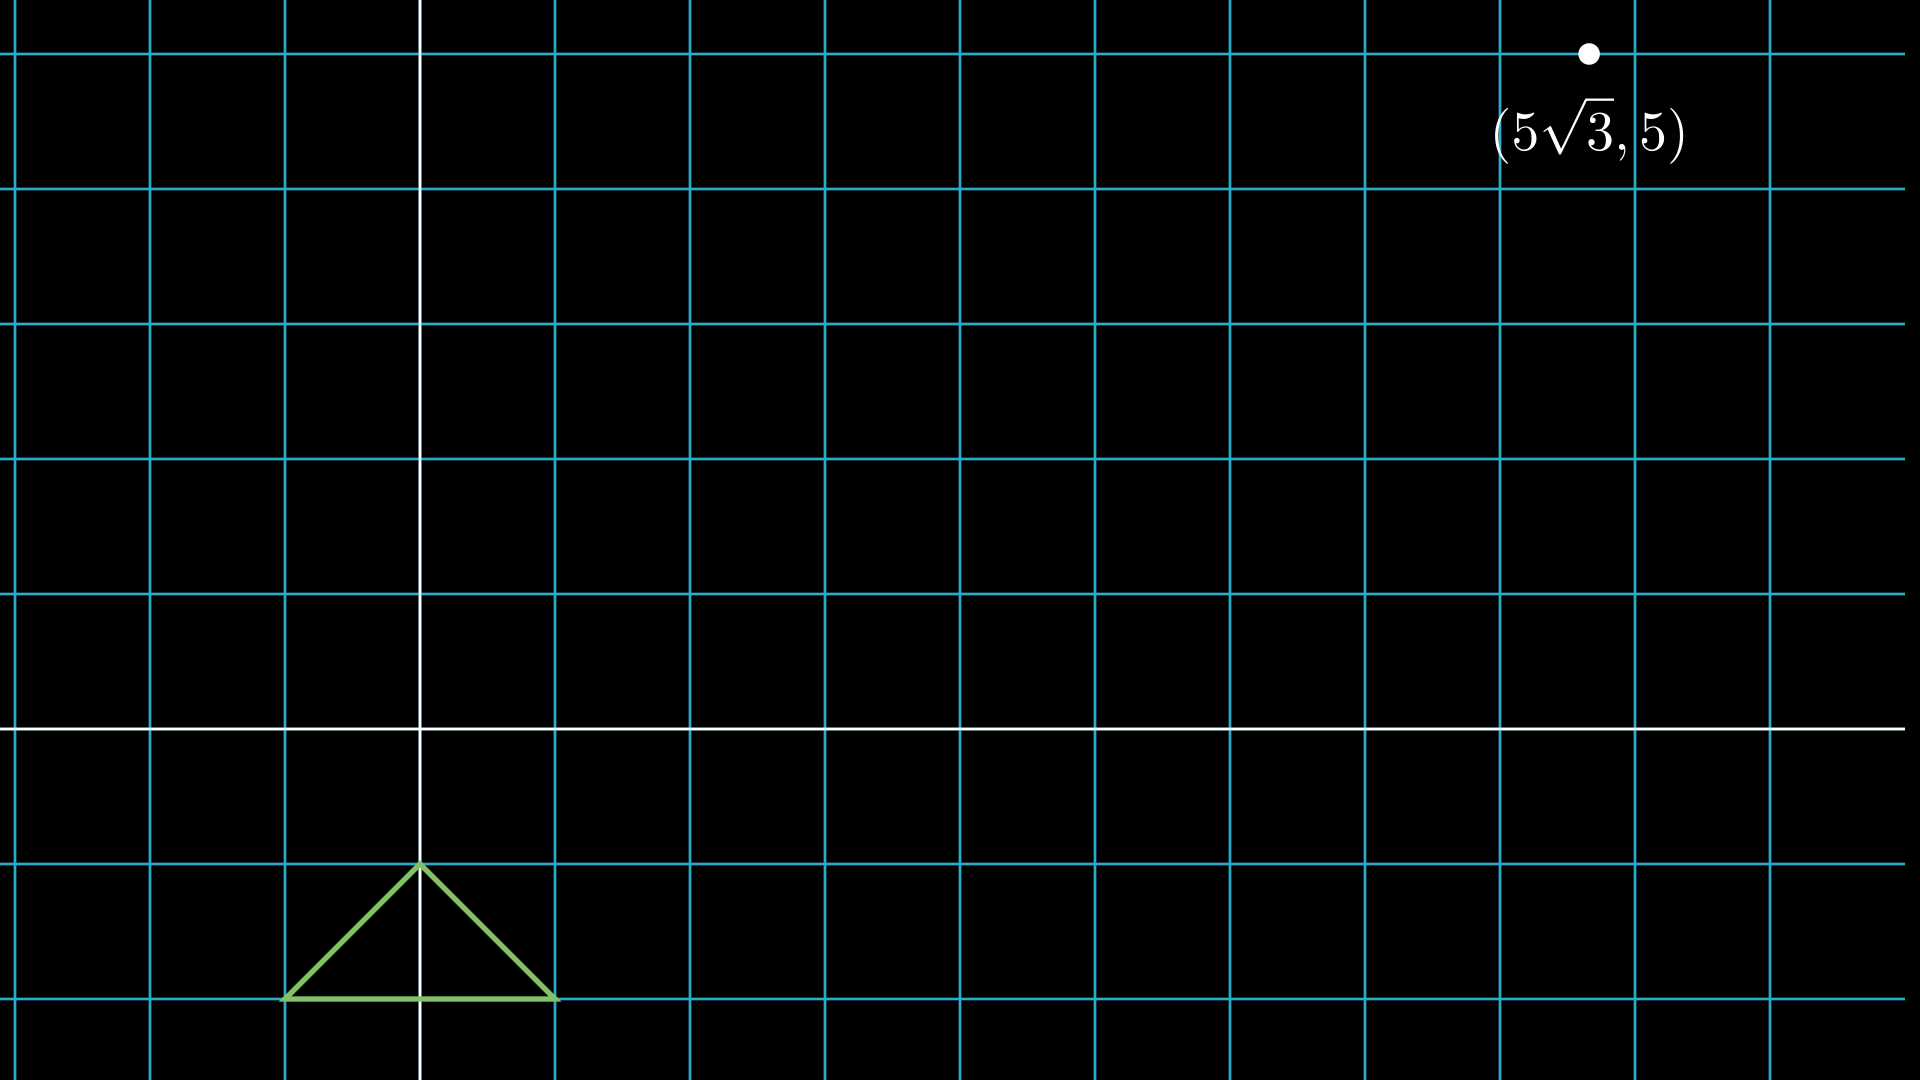

In [786]:
%manim -qh scene1

                    INFO                                                                   ]8;id=535400;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=267032;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\Users\Jordan\linear\media\images\linear\scene2_ManimCE_v0                         
                             .18.0.png'                                                                            
                                                                                                                   

                    INFO     Rendered scene2                                                           ]8;id=330266;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=218992;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 0 animations                                                                   

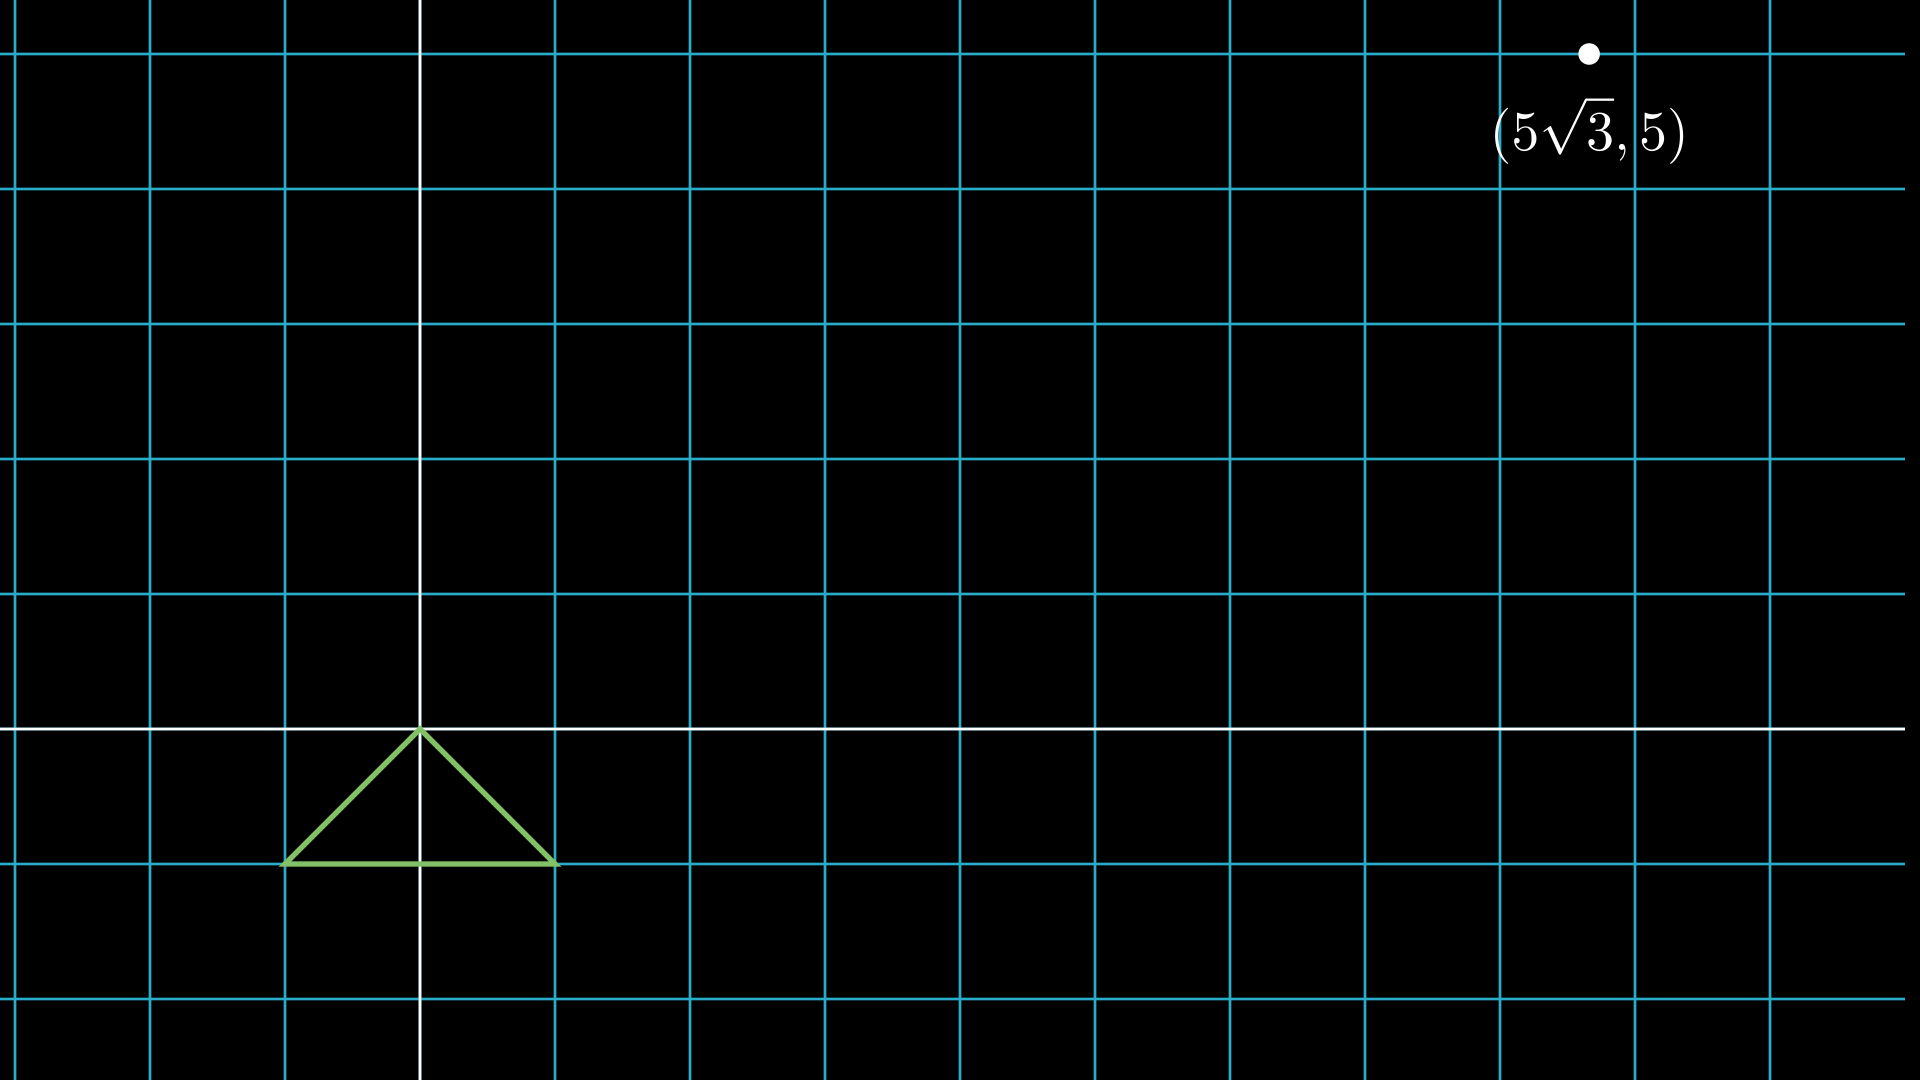

In [787]:
%manim -qh scene2

[02/28/24 15:39:50] INFO                                                                   ]8;id=514206;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=809167;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\Users\Jordan\linear\media\images\linear\scene3_ManimCE_v0                         
                             .18.0.png'                                                                            
                                                                                                                   

                    INFO     Rendered scene3                                                           ]8;id=116604;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=10517;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 0 animations                                                                   

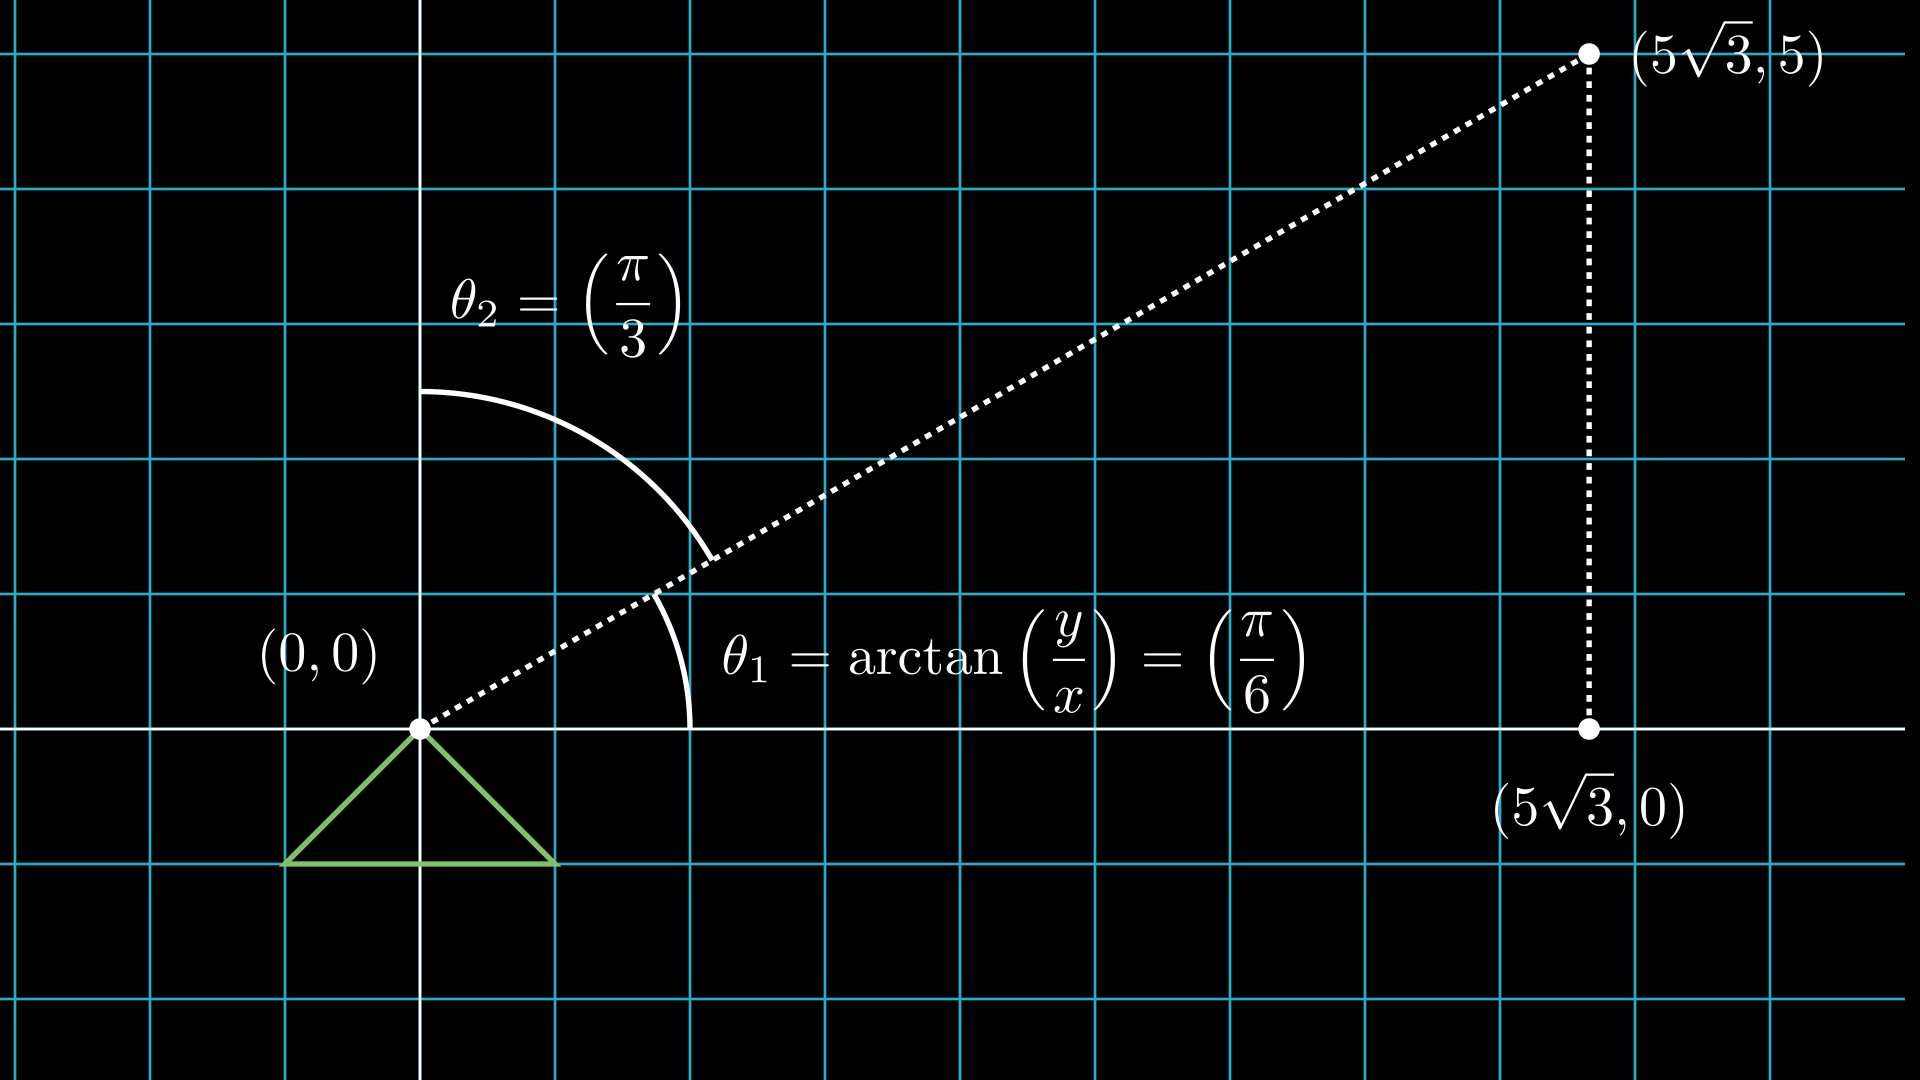

In [788]:
%manim -qh scene3

                    INFO                                                                   ]8;id=14119;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=385154;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\Users\Jordan\linear\media\images\linear\scene4_ManimCE_v0                         
                             .18.0.png'                                                                            
                                                                                                                   

                    INFO     Rendered scene4                                                           ]8;id=452811;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=633787;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 0 animations                                                                   

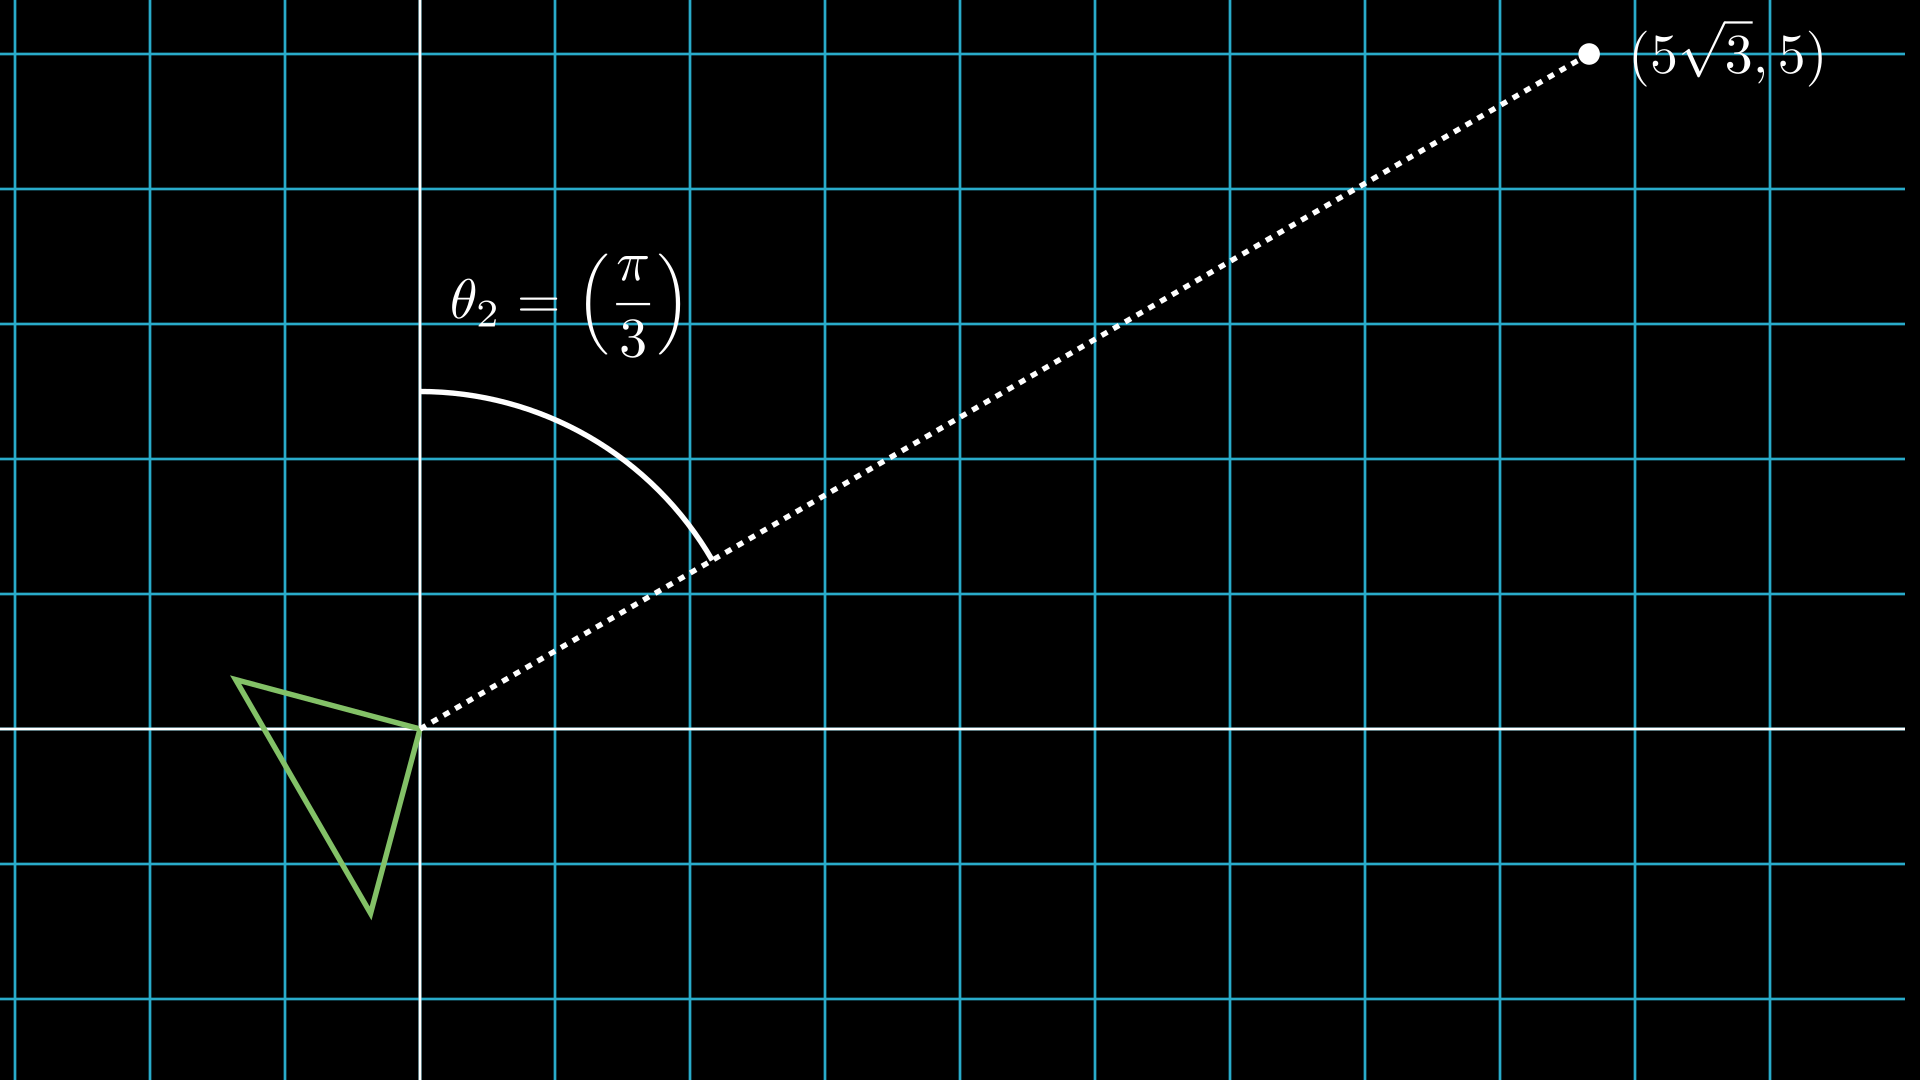

In [789]:
%manim -qh scene4

                    INFO                                                                   ]8;id=67872;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=411585;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene_file_writer.py#735\735]8;;\
                             File ready at                                                                         
                             'C:\Users\Jordan\linear\media\images\linear\scene5_ManimCE_v0                         
                             .18.0.png'                                                                            
                                                                                                                   

                    INFO     Rendered scene5                                                           ]8;id=391966;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=435611;file://C:\tools\Manim\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 0 animations                                                                   

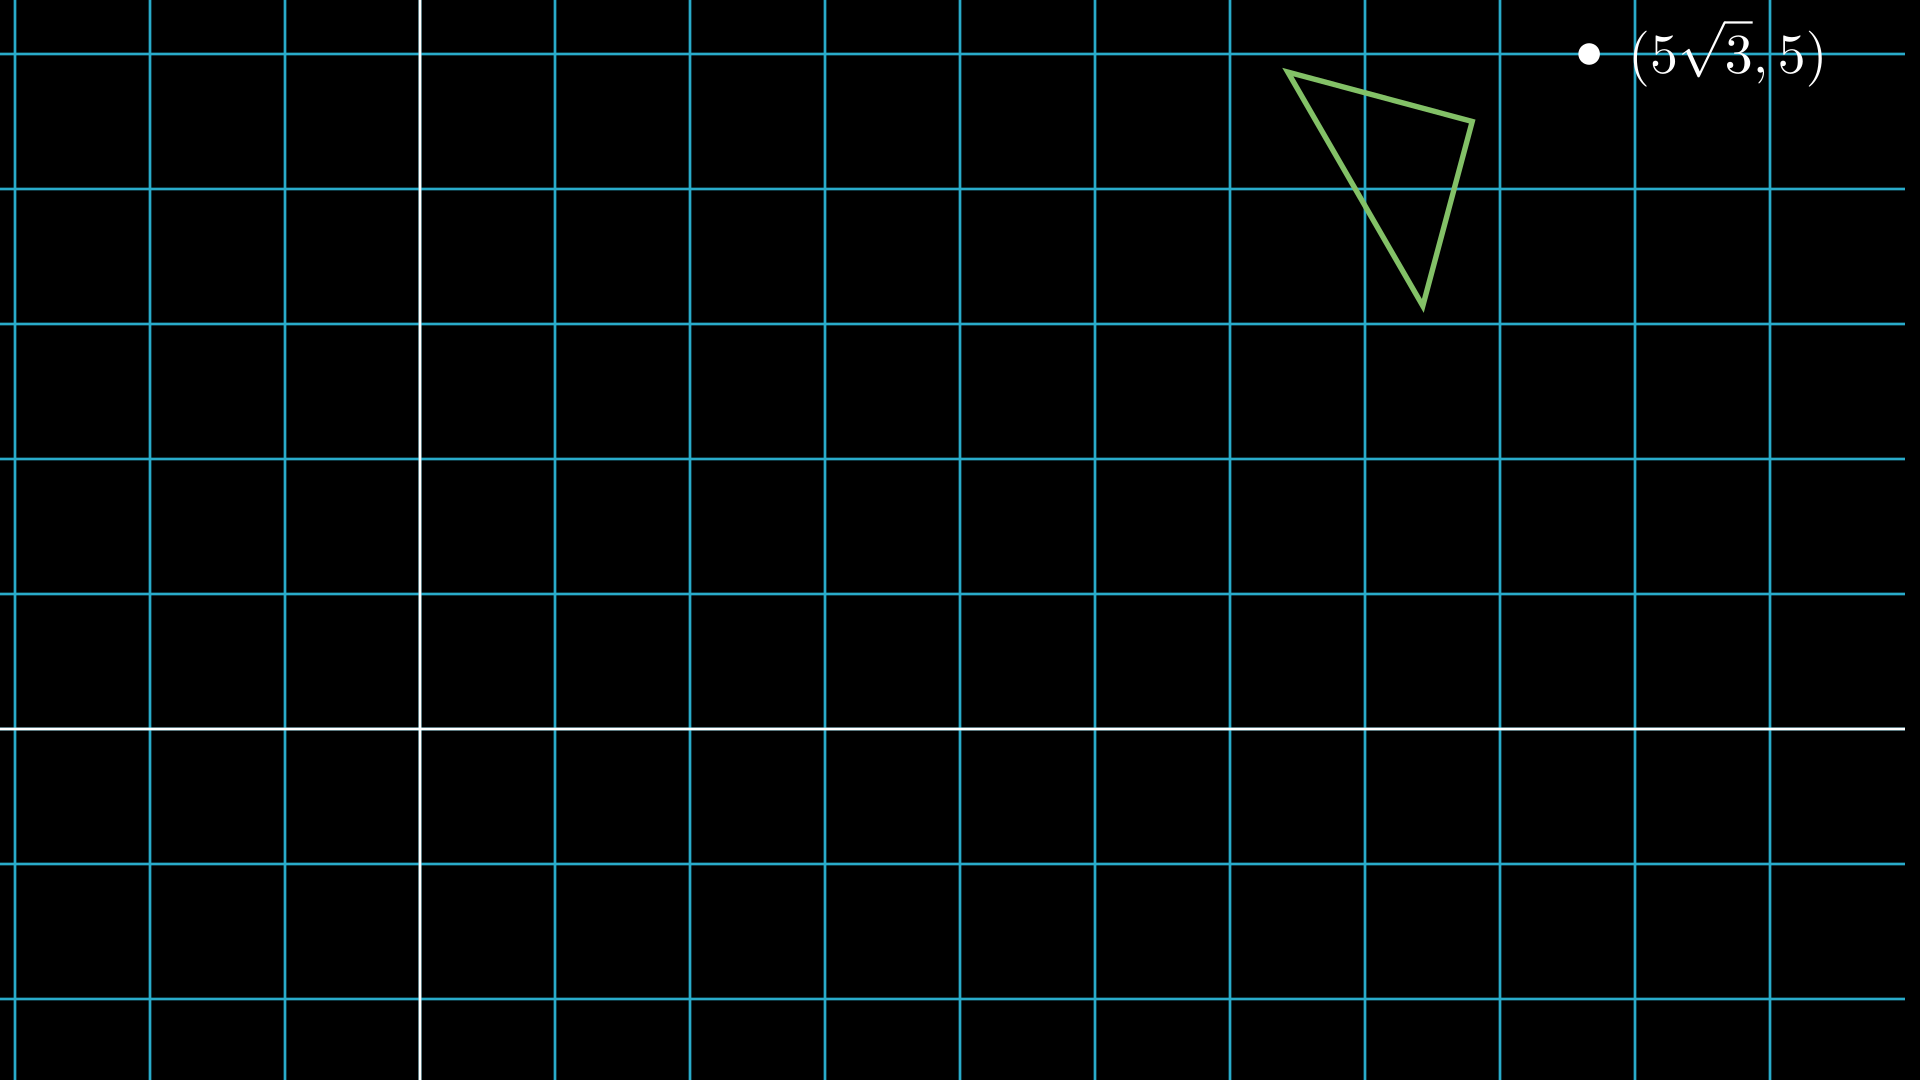

In [790]:
%manim -qh scene5